In [ ]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
# make it easier to understand by importing the required libraries within keras
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras import initializers
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
def model(j):
    regression_ml_model = keras.models.Sequential([
    Dense(j, activation='sigmoid', input_shape=(1,),kernel_initializer=initializers.RandomNormal(stddev=10), bias_initializer=initializers.RandomNormal(stddev=10)),
    Dense(1, activation='linear',input_shape=(1,),kernel_initializer=initializers.RandomNormal(stddev=10), bias_initializer=initializers.RandomNormal(stddev=10))
          ])
    # optimizer = keras.optimizers.Adam(lr=0.0009)
    regression_ml_model.compile(loss='mean_squared_error', optimizer='adam')
    # regression_ml_model.compile(loss='mean_squared_error', optimizer=optimizer)

    return regression_ml_model





In [ ]:
# from re import VERBOSE
# from sklearn.utils import validation

def kflod_training(model,X,Y):

  if X.size < 10:
    Kf_folds = KFold(n_splits=8, shuffle=True)
  else:
    Kf_folds = KFold(n_splits=10, shuffle=True)

  earlystop =EarlyStopping(monitor='val_loss', mode='min',patience = 10)
  # earlystop_loss =EarlyStopping(monitor='loss', mode='min',patience = 100)

  
  train_loss = []
  val_loss = []
  for training,validation in Kf_folds.split(X, Y):

    model_history = model.fit(X[training], Y[training], 
                            epochs=100,
                            validation_data=(X[validation], Y[validation]),
                            callbacks=[earlystop],batch_size=1)
    
    minum_val_loss_index = np.argmin(model_history.history["val_loss"])
    train_loss.append(model_history.history["loss"][-1])
                      # [minum_val_loss_index])
    val_loss.append(model_history.history["val_loss"][-1])
                    # [minum_val_loss_index])
    

  val_loss = np.array(val_loss)
  train_loss = np.array(train_loss)

  

  mean_performance_val_loss = np.mean(val_loss)
  mean_performance_loss = np.mean(train_loss)


  return model, model_history, mean_performance_val_loss, mean_performance_loss







In [ ]:
# Datapoints range
i = [10,40,80,200]
# i = [200,40,80,200]

# neurons range 
j = [2,10,40,100]
#j = [100,10,40,100]
# np.random.seed(1)

models_grid_val_loss = np.zeros((4, 4))
models_grid_loss = np.zeros((4, 4))
# print(models_grid_loss)

for index_i,data_size in enumerate(i):
  # x = np.linspace(-1,1,data_size)
  x = np.linspace(-2,2,data_size)


  # y = x*np.sin((6*np.pi*x))*np.exp((-x**2))
  y = np.exp((x**2))*np.arctan(x)*np.sin((4*np.pi*x))

  for index_j, neurons in enumerate(j):
    
    
    # shuffling dataset for same model 5 times
    mean_val_loss = []
    mean_loss = []
    for shuffle in range(5):

      X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,shuffle=True)
      model_created = model(neurons)
      model_trained, model_history, val_loss, loss= kflod_training(model_created,X_train,Y_train)
      mean_val_loss.append(val_loss)
      mean_loss.append(loss)

      # y_pred = model_trained.predict(X_test)

      # plt.scatter(x,y, color = "b")
      # plt.scatter(X_test,y_pred, color = "g")
  #     break
  #   break
  # break



    
    models_grid_val_loss[index_i][index_j] = mean_val_loss[np.argmin(mean_val_loss)]
    models_grid_loss[index_i][index_j] = mean_loss[np.argmin(mean_val_loss)]
print(models_grid_val_loss)
print(models_grid_loss)




      # print(model_history.history.keys())









Epoch 1/100
1/7 [===>..........................] - ETA: 6s - loss: 3743.5371

KeyboardInterrupt: ignored

In [ ]:
print(models_grid_val_loss)
print("")
print(models_grid_loss)


[[ 5.37743096 18.30296846 81.47357227 11.567099  ]
 [70.30273875 67.60709114 96.92154443 68.55093472]
 [89.77311516 74.5639677  84.55175076 79.25005119]
 [84.66113663 74.94515228 68.22557898 75.7697403 ]]

[[  5.23260483  26.45183414 240.95898771   8.02376878]
 [ 67.72899265  76.45423851  81.37366028  62.05134373]
 [ 86.98589897  77.27373924  77.03583755  75.32621231]
 [ 84.00533142  72.37851105  66.81119881  74.46739044]]


Epoch 1/500
160/160 [==============================] - 2s 2ms/step - loss: 269.0739
Epoch 2/500
160/160 [==============================] - 0s 2ms/step - loss: 248.3670
Epoch 3/500
160/160 [==============================] - 0s 2ms/step - loss: 229.7403
Epoch 4/500
160/160 [==============================] - 0s 3ms/step - loss: 212.6543
Epoch 5/500
160/160 [==============================] - 0s 2ms/step - loss: 196.9391
Epoch 6/500
160/160 [==============================] - 0s 3ms/step - loss: 182.6183
Epoch 7/500
160/160 [==============================] - 0s 2ms/step - loss: 169.1045
Epoch 8/500
160/160 [==============================] - 0s 2ms/step - loss: 156.6877
Epoch 9/500
160/160 [==============================] - 0s 2ms/step - loss: 145.1365
Epoch 10/500
160/160 [==============================] - 0s 2ms/step - loss: 134.3709
Epoch 11/500
160/160 [==============================] - 0s 2ms/step - loss: 124.1990
Epoch 12/500
160/160 [==============================] - 0s 2ms/step - loss

2/2 [==============================] - 0s 8ms/step


dict_keys(['loss'])

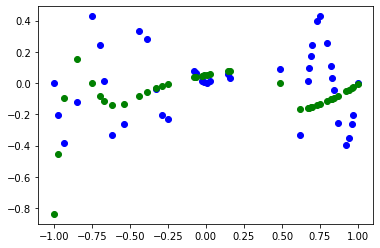

In [38]:
# i = 80
i = 200
j = 10
# j = 40



x = np.linspace(-1,1,i)
# x = np.linspace(-2,2,i)


y = x*np.sin((6*np.pi*x))*np.exp((-x**2))
# y = np.exp((x**2))*np.arctan(x)*np.sin((4*np.pi*x))

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,shuffle=True)
model_created = model(j)
earlystop =EarlyStopping(monitor='loss', mode='min', patience = 10)
model_history = model_created.fit(X_train, Y_train, 
                            epochs=500,batch_size=1,callbacks=[earlystop])

Y_pred = model_created.predict(X_test)

plt.scatter(X_test,Y_test, color = "b")
plt.scatter(X_test,Y_pred, color = "g")


model_history.history.keys()










7/7 [==============================] - 0s 2ms/step


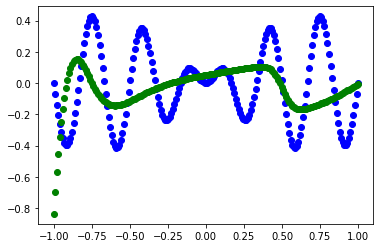

In [39]:
plt.scatter(x,y, color = "b")
plt.scatter(x,model_created.predict(x),color = "g")